# Build basic 2-Layer MLP to solve the xor-Problem

In [1]:
!pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 663.1 MB 1.8 kB/s 
     |████████████████████████████████| 8.8 MB 37.5 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.2.0+cu92 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.2.0+cu92 which is incompatible.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #for data generatio

In [3]:
X, y = make_blobs(n_samples=200, n_features=2, cluster_std=.1
                  ,centers= [(1,1), (1,0), (0,0),(0,1)])

In [4]:
y[y==2]=0
y[y==3]=1

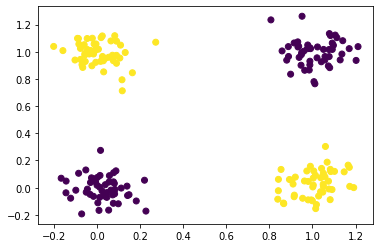

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

## Steps:
* build train and test sets
* write MLP class in Pytorch with two layers with adjustable number of perceptrons
* use nn.linear and nn.Sigmoid() units
* train your model
* test your model

In [29]:
import torch 
class MLP(torch.nn.Module): #all nets inherit from nn.Module
    def __init__(self): #define layer types
        super(MLP, self).__init__()
        self.fc1 = torch.nn.Linear(2,4,bias=False) #1st layer input dim = 2, output =4 - | input needs to have size of data
        self.fc2 = torch.nn.Linear(4,1,bias=False) #2nd layer input 4 out put 2 | output needs to be one for binary problem
        self.non_linear = torch.nn.Sigmoid() #non-linear activation 

    def forward(self, x): #build network
        output = self.fc1(x) #w*X
        output = self.non_linear(output) # activation
        output = self.fc2(output) #w*X
        output = self.non_linear(output) # activation 
        return output

In [30]:

from sklearn.model_selection import train_test_split #for test set generation
#split in train and test 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#np->torch
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)


In [31]:
print(x_train.shape,y_train.shape)

torch.Size([134, 2]) torch.Size([134])


In [32]:
#get instance of perceptron model
model = MLP()

#define loss function
criterion = torch.nn.BCELoss()

#define optimizer -> SGD with learning rate lr
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [33]:
#show model
print(model)

MLP(
  (fc1): Linear(in_features=2, out_features=4, bias=False)
  (fc2): Linear(in_features=4, out_features=1, bias=False)
  (non_linear): Sigmoid()
)


In [34]:
model.train() #set to train mode
iterations = 500
for iter in range(iterations):
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(x_train)
    # Compute Loss
    loss = criterion(y_pred.squeeze(), y_train)
   
    print('Iter {}: train loss: {}'.format(iter, loss.item()))
    # Backward pass
    loss.backward()
    #make gradient update
    optimizer.step()

Iter 0: train loss: 0.7008231282234192
Iter 1: train loss: 0.7007817029953003
Iter 2: train loss: 0.7007405161857605
Iter 3: train loss: 0.7006993889808655
Iter 4: train loss: 0.7006590962409973
Iter 5: train loss: 0.7006181478500366
Iter 6: train loss: 0.700577974319458
Iter 7: train loss: 0.7005379796028137
Iter 8: train loss: 0.7004981637001038
Iter 9: train loss: 0.7004583477973938
Iter 10: train loss: 0.7004188299179077
Iter 11: train loss: 0.7003799080848694
Iter 12: train loss: 0.700340747833252
Iter 13: train loss: 0.7003021240234375
Iter 14: train loss: 0.700263500213623
Iter 15: train loss: 0.7002254128456116
Iter 16: train loss: 0.7001873254776001
Iter 17: train loss: 0.7001492977142334
Iter 18: train loss: 0.7001116275787354
Iter 19: train loss: 0.7000740766525269
Iter 20: train loss: 0.7000367641448975
Iter 21: train loss: 0.6999996900558472
Iter 22: train loss: 0.6999627947807312
Iter 23: train loss: 0.6999263167381287
Iter 24: train loss: 0.6998896598815918
Iter 25: trai

In [35]:
#test 
y_pred = model(x_test) #predict
y_pred=(y_pred>0.5).int().flatten() #argmax class lable
test_acc = y_test.shape[0]/torch.sum(y_pred == y_test.int()) #check result: devide num of samples by num of correct ones, need to cast to int
print("test ACC: ",test_acc.float())

test ACC:  tensor(1.)
